# Predicting House Sale Prices with Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
pd.options.display.max_columns = 99

data = pd.read_table('AmesHousing.tsv')
data.head()

C:\Users\Sulaimam\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
def transform_features_1(df):
    return df

In [3]:
def select_features_1(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [4]:
def train_and_test_1(df):
    train = df.copy()[:1460]
    test = df.copy()[1460:]
    
    numeric_train = train.select_dtypes(include=['float', 'integer'])
    numeric_test = test.select_dtypes(include=['float', 'integer'])
    
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test['SalePrice Prediction'] = lr.predict(test[features])
    
    mse = mean_squared_error(test['SalePrice Prediction'], test['SalePrice'])
    rmse = mse**(1/2)
    
    return rmse

transformed_df_1 = transform_features_1(data)
filtered_df_1 = select_features_1(transformed_df_1)
rmse_1 = train_and_test_1(filtered_df_1)
rmse_1

57088.25161263909

## Feature Engineering



In [5]:
# number of missing values
num_missing = data.isnull().sum()

num_missing[num_missing > len(data)/20].sort_values()


Garage Type       157
Garage Yr Blt     159
Garage Finish     159
Garage Qual       159
Garage Cond       159
Lot Frontage      490
Fireplace Qu     1422
Fence            2358
Alley            2732
Misc Feature     2824
Pool QC          2917
dtype: int64

In [6]:
# Filter Series to columns containing >5% missing values
missing_cols = num_missing[num_missing > len(data)/20]
data = data.drop(missing_cols.index, axis=1)
# data.select_dtypes(include=['object']).info()

In [7]:
# get text columns with their respective missing values
text_nv_count = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

In [8]:
# Filter Series to columns containing any missing value
text_missing = text_nv_count[text_nv_count > 0]
data = data.drop(text_missing.index, axis=1)
# data.select_dtypes(include=['object']).info()

In [9]:
# Compute column-wise missing value counts
num_mv_count = data.select_dtypes(include=['float','int']).isnull().sum().sort_values(ascending=False)

# Filter Series to columns containing any missing value
num_missing_cols = num_mv_count[num_mv_count > 0].index
num_missing_df = data[num_missing_cols]
# compute the mode of each column and make a dictionary of it
modes_dict = num_missing_df.mode().iloc[0].to_dict()
modes_dict

{'Mas Vnr Area': 0.0,
 'Bsmt Half Bath': 0.0,
 'Bsmt Full Bath': 0.0,
 'Garage Area': 0.0,
 'Garage Cars': 2.0,
 'Total Bsmt SF': 0.0,
 'Bsmt Unf SF': 0.0,
 'BsmtFin SF 2': 0.0,
 'BsmtFin SF 1': 0.0}

In [10]:
# replace missing values with the modes_dict
data = data.fillna(modes_dict)

In [11]:
data[num_missing_cols].isnull().sum()

Mas Vnr Area      0
Bsmt Half Bath    0
Bsmt Full Bath    0
Garage Area       0
Garage Cars       0
Total Bsmt SF     0
Bsmt Unf SF       0
BsmtFin SF 2      0
BsmtFin SF 1      0
dtype: int64

In [12]:
data.isnull().sum().value_counts()

0    64
dtype: int64

What new features can we create that can better capture the information in some of the features?

In [13]:
years_sold = data['Yr Sold'] - data['Year Built']
# Check out for extraneous values
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [14]:
years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
# Check out for extraneous values
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [15]:
# Create new columns
data['Years Before Sale'] = years_sold
data['Years Since Remod'] = years_since_remod

# Drop rows with negative values for both of these new features
data = data.drop([1702, 2180, 2181], axis=0)

# No longer need original year columns
data = data.drop(["Year Built", "Year Remod/Add"], axis = 1)

Drop columns that:

* that aren't useful for ML
* leak data about the final sale (from documentation)

In [16]:
# Drop columns that leak info about the final sale
data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis=1)
# Drop columns that are not useful for Machine Learning
data = data.drop(['PID', 'Order'], axis=1)

In [17]:
data.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Area', 'Street', 'Lot Shape',
       'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',
       'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
       'Overall Qual', 'Overall Cond', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Cars', 'Garage Area', 'Paved Drive',
       'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch',
       'Screen Porch', 'Pool Area', 'Misc Val', 'SalePrice',
       'Years Before Sale', 'Years Since Remod'],
      dtype='object')

#### Let's update our transform_features() function

Re-writing the functions again. This time around, all the cleaning processes are contained in the functions.

In [18]:
def transform_features_2(df):
    num_missing = df.isnull().sum()
    missing_cols = num_missing[num_missing > len(df)/20]
    df = df.drop(missing_cols.index, axis=1)
    
    text_nv_count = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    text_missing = text_nv_count[text_nv_count > 0]
    df = df.drop(text_missing.index, axis=1)
    
    num_mv_count = df.select_dtypes(include=['float','int']).isnull().sum().sort_values(ascending=False)
    num_missing_cols = num_mv_count[num_mv_count > 0].index
    num_missing_df = df[num_missing_cols]
    modes_dict = num_missing_df.mode().iloc[0].to_dict()
    df = df.fillna(modes_dict)
    
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['Years Before Sale'] = years_sold
    df['Years Since Remod'] = years_since_remod
    df = df.drop([1702, 2180, 2181], axis=0)
    df = df.drop(["Year Built", "Year Remod/Add"], axis = 1)
    
    df = df.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold", "PID", "Order"], axis=1)
    
    return df

def select_features_2(df):
    return df[['Gr Liv Area', 'SalePrice']]

def train_and_test_2(df):
    train = df.copy()[:1460]
    test = df.copy()[1460:]
    
    numeric_train = train.select_dtypes(include=['float', 'integer'])
    numeric_test = test.select_dtypes(include=['float', 'integer'])
    
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test['SalePrice Prediction'] = lr.predict(test[features])
    
    mse = mean_squared_error(test['SalePrice Prediction'], test['SalePrice'])
    rmse = mse**(1/2)
    
    return rmse

# using the same dataset prior to any cleaning process. 
# All THE CLEANING PROCESSES ARE CONTAINED IN THE FUNCTIONS
data_2 = pd.read_table('AmesHousing.tsv')
transformed_df_2 = transform_features_2(data_2)
filtered_df_2 = select_features_2(transformed_df_2)
rmse_2 = train_and_test_2(filtered_df_2)
rmse_2

C:\Users\Sulaimam\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.


55275.367312413066

## Feature Selection

In [19]:
numerical_df = transformed_df_2.select_dtypes(include=['int64', 'float'])
numerical_df.head(5)
# transformed_df_2['Garage Cars'].dtype

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Before Sale,Years Since Remod
0,20,31770,6,5,112.0,639.0,0.0,441.0,1080.0,1656,0,0,1656,1.0,0.0,1,0,3,1,7,2,2.0,528.0,210,62,0,0,0,0,0,215000,50,50
1,20,11622,5,6,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1.0,730.0,140,0,0,0,120,0,0,105000,49,49
2,20,14267,6,6,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1.0,312.0,393,36,0,0,0,0,12500,172000,52,52
3,20,11160,7,5,0.0,1065.0,0.0,1045.0,2110.0,2110,0,0,2110,1.0,0.0,2,1,3,1,8,2,2.0,522.0,0,0,0,0,0,0,0,244000,42,42
4,60,13830,5,5,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,2.0,482.0,212,34,0,0,0,0,0,189900,13,12


In [20]:
abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
abs_corr_coeffs
# numerical_df.corr()

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
BsmtFin SF 1         0.439284
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
Years Since Remod    0.534985
Full Bath            0.546118
Years Before Sale    0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: Sale

In [21]:
## Let's drop columns with a correlation coefficient of less than 0.4 (arbitrary)
less_than_threshold = abs_corr_coeffs[abs_corr_coeffs < 0.4]
less_than_threshold

BsmtFin SF 2       0.006127
Misc Val           0.019273
3Ssn Porch         0.032268
Bsmt Half Bath     0.035875
Low Qual Fin SF    0.037629
Pool Area          0.068438
MS SubClass        0.085128
Overall Cond       0.101540
Screen Porch       0.112280
Kitchen AbvGr      0.119760
Enclosed Porch     0.128685
Bedroom AbvGr      0.143916
Bsmt Unf SF        0.182751
Lot Area           0.267520
2nd Flr SF         0.269601
Bsmt Full Bath     0.276258
Half Bath          0.284871
Open Porch SF      0.316262
Wood Deck SF       0.328183
Name: SalePrice, dtype: float64

In [22]:
# Making use of the already transformed dataframe: transformed_df_2
transformed_df = transformed_df_2.drop(less_than_threshold.index, axis=1)
transformed_df.select_dtypes(include=['int64','float']).columns

Index(['Overall Qual', 'Mas Vnr Area', 'BsmtFin SF 1', 'Total Bsmt SF',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Cars', 'Garage Area', 'SalePrice', 'Years Before Sale',
       'Years Since Remod'],
      dtype='object')

In [23]:
# import seaborn as sns
# sns.heatmap(numerical_df.corr())

#### Which categorical columns should we keep?

In [24]:
# list of column names from documentation that are meant to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley",
                    "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style",
                    "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating",
                    "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [25]:
transform_cat_cols = []

for col in nominal_features:
    if col in transformed_df.columns:
        transform_cat_cols.append(col)

transform_cat_cols

['MS Zoning',
 'Street',
 'Land Contour',
 'Lot Config',
 'Neighborhood',
 'Condition 1',
 'Condition 2',
 'Bldg Type',
 'House Style',
 'Roof Style',
 'Roof Matl',
 'Exterior 1st',
 'Exterior 2nd',
 'Foundation',
 'Heating',
 'Central Air']

In [26]:
# How many unique values are in each categorical column?
uniqueness_counts = transformed_df_2[transform_cat_cols].apply(
    lambda col: len(col.unique())).sort_values()
uniqueness_counts

Street           2
Central Air      2
Land Contour     4
Lot Config       5
Bldg Type        5
Roof Style       6
Foundation       6
Heating          6
MS Zoning        7
Condition 2      8
House Style      8
Roof Matl        8
Condition 1      9
Exterior 1st    16
Exterior 2nd    17
Neighborhood    28
dtype: int64

In [27]:
# Arbitrary cut-off of 10 unique values
# Drop columns with more than 10 unique values
uniq_greater_10 = uniqueness_counts[uniqueness_counts > 10]
transformed_df = transformed_df.drop(uniq_greater_10.index, axis=1)
transformed_df.columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Roof Style', 'Roof Matl',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation',
       'BsmtFin SF 1', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       '1st Flr SF', 'Gr Liv Area', 'Full Bath', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'SalePrice', 'Years Before Sale',
       'Years Since Remod'],
      dtype='object')

In [28]:
# Select just the remaining text columns and convert to categorical
text_cols = transformed_df.select_dtypes(include=['object']).columns
for col in text_cols:
    transformed_df[col] = transformed_df[col].astype('category')

# Create dummy columns and add back to the dataframe!
for col in text_cols:
    col_dummies = pd.get_dummies(transformed_df[col], prefix=col)
    transformed_df = pd.concat([transformed_df, col_dummies], axis=1)
    del transformed_df[col]

# transformed_df.columns
transformed_df

,Overall Qual,Mas Vnr Area,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,TotRms AbvGrd,Fireplaces,Garage Cars,Garage Area,SalePrice,Years Before Sale,Years Since Remod,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Street_Grvl,Street_Pave,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,...,Roof Matl_Metal,Roof Matl_Roll,Roof Matl_Tar&Grv,Roof Matl_WdShake,Roof Matl_WdShngl,Exter Qual_Ex,Exter Qual_Fa,Exter Qual_Gd,Exter Qual_TA,Exter Cond_Ex,Exter Cond_Fa,Exter Cond_Gd,Exter Cond_Po,Exter Cond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Heating QC_Ex,Heating QC_Fa,Heating QC_Gd,Heating QC_Po,Heating QC_TA,Central Air_N,Central Air_Y,Kitchen Qual_Ex,Kitchen Qual_Fa,Kitchen Qual_Gd,Kitchen Qual_Po,Kitchen Qual_TA,Functional_Maj1,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sal,Functional_Sev,Functional_Typ,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,6,112.0,639.0,1080.0,1656,1656,1,7,2,2.0,528.0,215000,50,50,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,5,0.0,468.0,882.0,896,896,1,5,0,1.0,730.0,105000,49,49,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
2,6,108.0,923.0,1329.0,1329,1329,1,6,0,1.0,312.0,172000,52,52,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
3,7,0.0,1065.0,2110.0,2110,2110,2,8,2,2.0,522.0,244000,42,42,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,5,0.0,791.0,928.0,928,1629,2,6,1,2.0,482.0,189900,13,12,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1
5,6,20.0,602.0,926.0,926,1604,2,7,1,2.0,470.0,195500,12,12,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
6,8,0.0,616.0,1338.0,1338,1338,2,6,0,2.0,582.0,213500,9,9,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
7,8,0.0,263.0,1280.0,1280,1280,2,5,0,2.0,506.0,191500,18,18,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
8,8,0.0,1180.0,1595.0,1616,1616,2,5,1,2.0,608.0,236500,15,14,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
9,7,0.0,0.0,994.0,1028,1804,2,7,1,2.0,442.0,189000,11,11,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


#### Update the select_features() function 

In [39]:
def select_features_3(df):
    numerical_df = df.select_dtypes(include=['integer', 'float'])
    abs_corr_coeffs = numerical_df.corr()['SalePrice'].abs().sort_values()
    less_than_threshold = abs_corr_coeffs[abs_corr_coeffs < 0.4]
    df = df.drop(less_than_threshold.index, axis=1)
    
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley",
                    "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style",
                    "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating",
                    "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    transform_cat_cols = []
    for col in nominal_features:
        if col in df.columns:
            transform_cat_cols.append(col)
            
    uniqueness_counts = df[transform_cat_cols].apply(
        lambda col: len(col.unique())).sort_values()
    uniq_greater_10 = uniqueness_counts[uniqueness_counts > 10]
    df = df.drop(uniq_greater_10.index, axis=1)
    
    text_cols = df.select_dtypes(include=['object']).columns
    for col in text_cols:
        df[col] = df[col].astype('category')
        
    for col in text_cols:
        col_dummies = pd.get_dummies(df[col])
        df = pd.concat([df, col_dummies], axis=1)
        del df[col]
    
    
    return df

In [40]:
# data_3 = data_2.copy()
# transformed_df_3 = transform_features_2(data_3)
# select_features_3(transformed_df_3)

In [41]:
from sklearn.model_selection import KFold

def train_and_test_3(df, k):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.drop('SalePrice', axis=1).columns
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]

        lr.fit(train[features], train["SalePrice"])
        predictions = lr.predict(test[features])
        mse = mean_squared_error(test["SalePrice"], predictions)
        rmse = np.sqrt(mse)
        return rmse
    
    if k == 1:
        # Randomize *all* rows (frac=1) from `df` and return
        shuffled_df = df.sample(frac=1)
        train = df[:1460]
        test = df[1460:]
        
        lr.fit(train[features], train["SalePrice"])
        predictions_one = lr.predict(test[features])        
        
        mse_one = mean_squared_error(test["SalePrice"], predictions_one)
        rmse_one = np.sqrt(mse_one)
        
        lr.fit(test[features], test["SalePrice"])
        predictions_two = lr.predict(train[features])        
       
        mse_two = mean_squared_error(train["SalePrice"], predictions_two)
        rmse_two = np.sqrt(mse_two)
        
        avg_rmse = np.mean([rmse_one, rmse_two])
        print(rmse_one)
        print(rmse_two)
        return avg_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_indices, test_indices, in kf.split(df):# indices is the plural of index
            train = df.iloc[train_indices]
            test = df.iloc[test_indices]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = mean_squared_error(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse
    
    

In [43]:
data_3 = data_2.copy()
transformed_df_3 = transform_features_2(data_3)
filtered_df_3 = select_features_3(transformed_df_3)
rmse_3 = train_and_test_3(filtered_df_3, k=4)
rmse_3

[24716.613518455208, 29226.828857193275, 26103.77164503244, 35870.24126152059]


28979.36382055038

### Visualization of the Root Mean Squared Errors

In [45]:
import matplotlib.pyplot as plt

print(rmse_1, rmse_2, rmse_3)


57088.25161263909 55275.367312413066 28979.36382055038


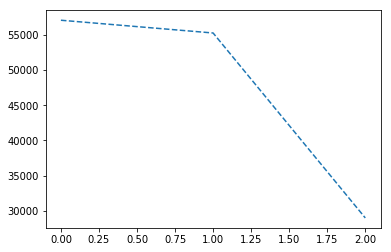

In [56]:
plt.plot([rmse_1, rmse_2, rmse_3], '--')

The above plot shows the decrease in the __Root Mean Squared Error__, due to __feature engineering__ and __feature selection__.